In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_groq import ChatGroq

model = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))

In [3]:
from langchain_core.prompts import PromptTemplate

In [4]:
#help(PromptTemplate)

In [5]:
#PromptTemplate.from_template('prompt-string/text')

PromptTemplate.from_template('I likes to read java book')

PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='I likes to read java book')

In [6]:
# To Create dynamic value -> template placeholder/variable {variable/placeholder}
# PromptTemplate.from_template('prompt-string/text') ->object
# object.format(userdefined_input_placeholder=Value)

In [7]:
obj = PromptTemplate.from_template('I likes to read {mybook} book')
obj.format(mybook="python")

'I likes to read python book'

In [8]:
obj

PromptTemplate(input_variables=['mybook'], input_types={}, partial_variables={}, template='I likes to read {mybook} book')

In [9]:
obj.format(mybook="story")

'I likes to read story book'

In [10]:
obj = PromptTemplate.from_template('I likes to read {mybook} book written by {author} released on {year}')
obj.format(mybook="birds",author='Mr.ABC',year=2004)

'I likes to read birds book written by Mr.ABC released on 2004'

In [11]:
ChatPromptTemplate
 |-> System Message 
         - sets behavior / rules for the LLM 
         - Priority instruction (ex: helpful assistant)
                     |-> tone(strict,friendly,expert)

 |-> Human Message 
          - user input - userQuery/question


context - CONTEXT - Retrieved documents  --> {context} <-- pre-defined placeholder
                                                +
                                                llm ->response 
    

1. Role/context 
2. Task 
3. Format - (ex: provide the answer as a bullet point 
                 write it in json format
                 keep it under 100 words...)
4. Constraints -  don't use technical jargon
                  use python 3.10 features only
5. example - optional

IndentationError: unexpected indent (1390617426.py, line 2)

In [ ]:
#from langchain.prompts import ChatPromtTemplate
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
#help(ChatPromptTemplate)
ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant'),
        ('human','I likes to read {mybook} books')
    ]
)

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant'),
        ('human','I likes to read {mybook} books')
    ]
)
prompt.format_messages(mybook="ruby")

In [ ]:
prompt.format_messages(mybook="ansible")

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant'),
        ('human','Question:{question}')
    ]
)

In [ ]:
chain_obj = prompt_object|llm_object   Langchain Expression - (LCE)
              (1)            (2)   

chain_obj.invoke({'question':'User Query'}) 

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

In [ ]:
from langchain_groq import ChatGroq

llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant'),
        ('human','Question:{question}')
    ]
)

In [ ]:
my_chain = prompt|llm_obj

In [ ]:
response = my_chain.invoke({'question':'What is Langchain?'})
print(response.content)

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant answer in 2 bullet points'),
        ('human','Question:{question}')
    ]
)

In [ ]:
my_chain = prompt|llm_obj
response = my_chain.invoke({'question':'What is Langchain?'})
print(response.content)

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system',"Say don't Know"),
        ('human','Question:{question}')
    ]
)
my_chain = prompt|llm_obj
response = my_chain.invoke({'question':'What is Langchain?'})
print(response.content)

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant answer in 2 bullet points'),
        ('human','Question:{question}')
    ]
)
my_chain = prompt|llm_obj
response = my_chain.invoke({'question':'What is Langchain?'})
print(response.content)

In [ ]:
## General Text - prompt 

In [ ]:
## Text summarization
text = '''
Aritfical Intelligence(AI) is transforming industries..
AI models are used in hearthcare,finance,education,enterprise indus and also support autonomous system'''

my_prompt = f'summarize the following text in 3 bullet points:\n {text}'

In [ ]:
print(my_prompt)

In [ ]:
from langchain_community.llms import Ollama
my_llm_obj = Ollama(model="gemma2:2b")

In [ ]:
print(my_llm_obj.invoke(my_prompt))

In [ ]:
## Text summarization
text = '''
Aritfical Intelligence(AI) is transforming industries..
AI models are used in hearthcare,finance,education,enterprise indus and also support autonomous system'''

my_prompt = f'summarize the following text in 2 bullet points:\n {text}'

In [ ]:
print(my_llm_obj.invoke(my_prompt))

In [ ]:
## Grammar and Text Correction

prompt = '''
Correct grammar and spelling mistakes in this text:
"AI are chaining the world in many way. It help peoples to work faster"
'''

response = llm_obj.invoke(prompt)

print(response)

In [ ]:
print(response.content)

In [ ]:
## Tasks - prompting

1. open any text file /log file - regular file - use python file handling --> open a inputFile ->read a content ->pass this input to prompt
2. define prompt - Summarize 5 bullet points

## Text to structred results (ex: json format)
Ex: text = "Ctpl indus was founded by Mr.Ram in the year 1982 in Bangalore"
name,year,industry,place 

## Text -->Rewrite 
Ex: text = "Our product is afforable and useful for every customers" 


In [ ]:
s = open('C:\\Users\\karth\\my_docs.txt').read()

prompt = f'Summarize the following text in 5 bullet points:\n\n{s}'

response = llm_obj.invoke(prompt)
print(response.content)

In [ ]:
## Text to structred results (ex: json format)
#Ex: text = "Ctpl indus was founded by Mr.Ram in the year 1982 in Bangalore"
#name,year,industry,place 

text = "Ctpl indus was founded by Mr.Ram in the year 1982 in Bangalore"

prompt = f"From the given text:{text} extract information such as name,year,indus,place in json"

response = llm_obj.invoke(prompt)
print(response.content)

In [ ]:
## Text -->Rewrite 
# Ex: text = "Our product is afforable and useful for every customers" 

text = "Our product is afforable and useful for every customers" 

prompt = f"Rewrite the given text:{text} in formal and profession:"

print(llm_obj.invoke(prompt).content)


In [ ]:
print(llm_obj.invoke(prompt).content)

In [ ]:
input_var = 'Give me professional appointment email for a candidate who was selected'
print(llm_obj.invoke(input_var).content) 

In [ ]:
## Internal steps 
   prompt | llm 

input prompt -->tokenization 
                    |->tokenID -->embedding vectors(768/1024..)

prompt: "Explain how to write C program" 

Tokenization:  [ 'Explain','how','to','write','C','program'] 
                 101      102    103   104    105   106 <-- tokenID

'Explain' ->101 -> [0.89,0.56,-0.76...] //embedding 
|
Transformer 
 |->self-attention
   |->TF-1 TF-2 .. probability of next token ->select token -->append token ->repeat 
|
prompt rule 
 |
You are an expert --------------> Activate expert style pattern
Step by step ----------------> probability of chain-like pattern structure 
...
json ---------------------------> json format
..
do not explain ------------------------------>suppress explination token
|
repetition ------------------------------ increase attention weights 

shot -- example

zero-shot prompt --> No Example  
one-shot prompt ---> Give one example
few-shot prompt --> more than one 
#####################

In RAG Application

data retrieved from database (vector Store) ---> {context}

prompt ==>  You are a helpful assistant.
            Use the following context to answer the question.
            Context:
            {context}
            Question:
            {question}


In [ ]:
from langchain_community.document_loaders import TextLoader
TextLoader('my_docs.txt')

In [ ]:
TextLoader('my_docs.txt').load()

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
docs = PyPDFLoader('attention.pdf').load()
len(docs)

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings

In [ ]:
HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")

In [ ]:
embeddings = HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")
len(embeddings.embed_query("Hello"))

In [ ]:
GML

(pA) -------------- (pB)
 |      
 |    / link prediction
(pC) /

Person - node 

In [ ]:
LangGraph is a framework - build agents as graph
nodes 
edges 
|
state - schema - shared data passed between steps 
|
loops and branches -- conditional routing -- retry 
##
|
Exteranl tool 

In [ ]:
## 
1. import langGraph module
2. define state - schema  ---- use class --- user defined class with TypedDict
3. create llm object
4. create tool object #
5. define node(s) - independent function - call arguments and return values follow the state schema (step-2)
|                                ---------------========= follow schema (rule)
|
6. build LangGraph - using StateGraph class ->object
             =====
             6.1  add new node1 add new node2 ... nodeN
             6.2  connect nodes 

7. compile and run -->Application_obj
8. Application_obj.invoke()

! pip install langgraph 

In [ ]:
# Create two agents 
              |
     Agent1 --- read user query from <STDIN>
       |
       |
     Agent2 
          ->read the user query from Agent1 
          ->invoke to llm (Agent2 <----> llm) 
          -> returns llm response to user



In [ ]:
llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))

In [ ]:
from langgraph.graph import StateGraph

In [ ]:
! pip show langgraph

In [ ]:
## define state schema 
class state(dict):
    messages: list

## define two nodes
def agent1_ask_question(a1: state):
    ''' Ask the user for input/query '''
    topic = input('Enter a topic name:')
    a1["messages"] = [f"Summarize {topic} in simple paragraph"]
    return a1

def agent2_summarize(a1: state):
    ''' Summarize the given topic '''
    prompt = a1["messages"][0] 
    response = llm_obj.invoke(prompt)
    print("AI Summary:",response)
    return a1


## build LangGraph
graph = StateGraph(state)
graph.add_node("Ask_topic",agent1_ask_question)
graph.add_node("Summarize",agent2_summarize)

## connect nodes 

graph.set_entry_point("Ask_topic")
graph.add_edge("Ask_topic","Summarize")
graph.set_finish_point("Summarize")

## compile and run - will get app
app = graph.compile()
app.invoke({})


In [ ]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
from typing import TypedDict

class state(TypedDict):
    question: str
    search_result: str
    answer: str

In [ ]:
def answer_node(state: obj):
    result = '...' <== string
    return {'search_result':result} <== dict

In [ ]:
## Tool 
DuckDuckGo - tool  
 |-> web search - search engine tool - get real-time information

used?
 -> model doesn't know current info (or) latest info 
 -> websearch ->get the info 
 -> building agents that can decide when to search 



In [ ]:
from langchain_community.tools import DuckDuckGoSearchRun

In [ ]:
search_obj = DuckDuckGoSearchRun()

In [ ]:
! pip install ddgs

In [12]:
from langchain_community.tools import DuckDuckGoSearchRun

In [13]:
search_obj = DuckDuckGoSearchRun()


In [14]:
search_obj.run("Latest Langchain version?")

"29 Aug 2025 · Latest release. The current stable version is v1.x. See the versioning policy for information about our release cycle. See the sidebar for links to release ... 14 Jan 2026 · Changes since langchain==1.2.7. release(langchain): 1.2.8 (#34976) chore(deps): bump the uv group across 20 directories with 3 updates (#34941) 2 Sept 2025 · What's new in LangChain v1 · Main loop integration: Structured output is now generated in the main loop instead of requiring an additional LLM call · Parsing ... create_agent · Prebuilt middleware · Custom middleware 4 days ago · Typescript bindings for langchain. Latest version: 1.2.16, last published: 3 days ago. Start using langchain in your project by running `npm i langchain`. 26 Aug 2025 · When we refer to a minor version, such as v0. 3, we always mean its latest available patch release (v0. 3. x)."

In [16]:
import time
time.time()

1770114849.232434

In [17]:
time.time()

1770114860.2254906

In [22]:
start = time.time()
result = search_obj.run("Latest Langchain version?")
print(f"completed in {time.time() - start:.2f} secs")

completed in 6.15 secs


In [ ]:
###

In [25]:
from typing import TypedDict

In [26]:
# State - schema
class State(TypedDict):
    question: str
    search_result: str
    answer: str

In [27]:
# LLM+Tool 
llm_obj =  ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))
search_obj = DuckDuckGoSearchRun()

In [ ]:
## Nodes 
node-1 -- search result -- function
            - input_args State 
            - basic operation - search user query (search_obj.run(state['question'])) ->result
            - return {"search_result":result}
|
node-2 -- answer_node --- function
           - input_args State
           - basic operation - prompt  -- Answer the questions using websearch
           - llm_obj.invoke(prompt) ->response_content 
|
|
Graph
|
add_node
add_node
|
set_entry_point -- search
|
app = grpah.compile()
..


In [28]:
from typing import TypedDict
from langgraph.graph import StateGraph
from langchain_groq import ChatGroq
from langchain_community.tools import DuckDuckGoSearchRun

In [29]:
# State - schema
class State(TypedDict):
    question: str
    search_result: str
    answer: str

In [30]:
# LLM+Tool 
llm_obj =  ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))
search_obj = DuckDuckGoSearchRun()

In [31]:
## Nodes
def search_node(a1: State):
    result = search_obj.run(a1['question'])
    return {"search_result":result}

In [32]:
def answer_node(a1: State):
    prompt = f'''Answer the question using web result
    Question:{a1['question']}
    Return Short answer'''
    resp = llm_obj.invoke(prompt)
    return {'answer':resp.content}

In [33]:
graph = StateGraph(State)

In [35]:
graph.add_node("search",search_node)
graph.add_node("answer",answer_node)
graph.set_entry_point("search")
graph.add_edge("search","answer")
graph.set_finish_point("answer")

In [37]:
app = graph.compile()
out = app.invoke({'question':'tell me latest version of ruby'})
print(out['answer'])

According to the official Ruby website, the latest version of Ruby is:

**3.2.0** (as of my cut-off knowledge in 2023)

Please note that this version may have changed since my knowledge cut-off date. I recommend checking the official Ruby website for the latest information on the current version:

https://www.ruby-lang.org/en/

You can also check the version by running `ruby -v` in your terminal.


In [38]:
out = app.invoke({'question':'tell me latest version of ruby'})
print(out['answer'])

The latest version of Ruby is 3.2.2, released on January 17, 2024.


In [39]:
out = app.invoke({'question':'tell me latest version of ruby'})
print(out['answer'])

According to the official Ruby website, as of my knowledge cutoff in 2023, the latest version of Ruby is:

**Ruby 3.2.2**

Please note that this information may have changed since my knowledge cutoff date. For the most up-to-date information, I recommend checking the official Ruby website: https://www.ruby-lang.org/en/


In [ ]:
##
## modify prompt -


In [40]:
## Nodes
def search_node(a1: State):
    result = search_obj.run(a1['question'])
    return {"search_result":result}

def answer_node(a1: State):
    prompt = f'''Answer the question using web result
    Question:{a1['question']}
    Web result:{a1['search_result']}
    
    Return Short answer.'''
    resp = llm_obj.invoke(prompt)
    return {'answer':resp.content}

In [41]:
graph = StateGraph(State)
graph.add_node("search",search_node)
graph.add_node("answer",answer_node)
graph.set_entry_point("search")
graph.add_edge("search","answer")
graph.set_finish_point("answer")
app = graph.compile()


In [43]:
out = app.invoke({'question':'tell me latest version of ruby'})
print(out['answer'])

The latest stable version of Ruby on Rails that is compatible with Ruby 1.8.7 is Rails 2.1.2.


In [45]:
out = app.invoke({'question':'tell me current weather in bangalore'})
print(out['answer'])

According to the latest web results, I couldn't find the exact current weather in Bangalore. However, I can tell you that the Meteorological Department has issued a rain alert due to a decrease in wind speed over the southwestern region. Unfortunately, I don't have real-time information to provide you with the current temperature or conditions. I recommend checking a reliable weather app or website like AccuWeather or Weather.com for the latest updates.


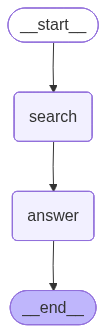

In [46]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
## Add condition loop 

Search ---> Answer ---> Check
                          |->Check Search Result - latest
                                           |->Not Latest -- retry

Every counter 
Increment - retry process


Flow
 |-> User Gives a question
 |-> Agent1 - searches - use DuckDuckGo
 |-> Agent2 - generate answer us ing LLM
 |=> Agent3 - Check answer quality 
                      |
                      | --> Weak -->retry -- search again --- loop -- based on condition 
                      | --> OK ---> Stop 

Search -->Answer -->Check
             []
             retry 

In [55]:
from typing import TypedDict
from langgraph.graph import StateGraph,END
from langchain_groq import ChatGroq
from langchain_community.tools import DuckDuckGoSearchRun

# State - schema
class State(TypedDict):
    question: str
    search_result: str
    answer: str
    retry_count: int
    max_retries: int

# LLM+Tool 
llm_obj =  ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))
search_obj = DuckDuckGoSearchRun()

## Nodes
def search_node(a1: State):
    print(f"\n search attempt:{a1['retry_count'] + 1}")
    result = search_obj.run(a1['question'])
    return {"search_result":result}

def answer_node(a1: State):
    prompt = f'''Answer the question using web result
    Question:{a1['question']}
    Web result:{a1['search_result']}
    
    Return Short answer.'''
    resp = llm_obj.invoke(prompt)
    return {'answer':resp.content}

In [56]:
## Conditional Check - node 
def testing_node(a1: State):
    ''' if answer is short/not found ->retry search until max retries'''
    answer = a1["answer"].strip()
    if "NOT_FOUND" in answer:
        if a1['retry_count'] < a1['max_retries']:
            return "retry"
        return "end"

    if len(answer) < 10:
        if a1["retry_count"] < a1['max_retries']:
            return "retry"
        return "end"
    return "end"


def increment_retry(a1: State):
    return {"retry_count":a1["retry_count"] + 1}


In [58]:
graph = StateGraph(State)
graph.add_node("search",search_node)
graph.add_node("answer",answer_node)
graph.add_node("inc_retry",increment_retry)

graph.set_entry_point("search")

graph.add_edge("search","answer")

## conditional loop 
graph.add_conditional_edges(
    "answer",
    testing_node,
    {
        "retry": "inc_retry",
        "end": END
    }
)
graph.add_edge("inc_retry","search") # if retry -->increment retry-->go back search

app = graph.compile()


In [60]:
out = app.invoke({
    "question": "What is the latest version of ruby and when was it released?",
    "search_result": "",
    "answer":"",
    "retry_count": 0,
    "max_retries": 2}
                )
print(out["answer"])


 search attempt:1
The latest version of Ruby is 3.4, which was released following a steady enhancement of the 1.8 series, including bug and security fixes, standard library updates, and feature enhancements, with a new version released every two months.


In [61]:
out = app.invoke({
    "question": "What is the latest version of ruby and when was it released?",
    "search_result": "",
    "answer":"",
    "retry_count": 0,
    "max_retries": 3}
                )
print(out["answer"])


 search attempt:1
The latest version of Ruby is Ruby 4.0, which was released on December 25, 2025.


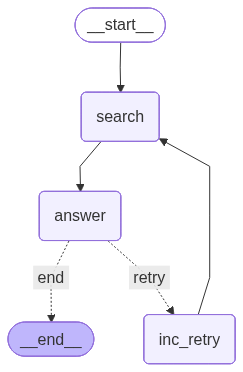

In [62]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [63]:
from typing import TypedDict
from langgraph.graph import StateGraph,END
from langchain_groq import ChatGroq
from langchain_community.tools import DuckDuckGoSearchRun

# State - schema
class State(TypedDict):
    question: str
    search_result: str
    answer: str
    retry_count: int
    max_retries: int

# LLM+Tool 
llm_obj =  ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'),temperature=0)
search_obj = DuckDuckGoSearchRun()

## Nodes
def search_node(a1: State):
    print(f"\n search attempt:{a1['retry_count'] + 1}")
    result = search_obj.run(a1['question'])
    return {"search_result":result}

def answer_node(a1: State):
    prompt = f'''Answer the question using web result
    Question:{a1['question']}
    Web result:{a1['search_result']}
    
    Return Short answer.'''
    resp = llm_obj.invoke(prompt)
    return {'answer':resp.content}

In [64]:
## Conditional Check - node 
def testing_node(a1: State):
    ''' if answer is short/not found ->retry search until max retries'''
    answer = a1["answer"].strip()
    if "NOT_FOUND" in answer:
        if a1['retry_count'] < a1['max_retries']:
            return "retry"
        return "end"

    if len(answer) < 10:
        if a1["retry_count"] < a1['max_retries']:
            return "retry"
        return "end"
    return "end"


def increment_retry(a1: State):
    return {"retry_count":a1["retry_count"] + 1}

In [65]:
graph = StateGraph(State)
graph.add_node("search",search_node)
graph.add_node("answer",answer_node)
graph.add_node("inc_retry",increment_retry)

graph.set_entry_point("search")

graph.add_edge("search","answer")

## conditional loop 
graph.add_conditional_edges(
    "answer",
    testing_node,
    {
        "retry": "inc_retry",
        "end": END
    }
)
graph.add_edge("inc_retry","search") # if retry -->increment retry-->go back search

app = graph.compile()

In [66]:
out = app.invoke({
    "question": "What is the latest version of ruby and when was it released?",
    "search_result": "",
    "answer":"",
    "retry_count": 0,
    "max_retries": 2}
                )
print(out["answer"])


 search attempt:1
The latest version of Ruby is 4.0, released on December 25, 2025.


In [67]:
out = app.invoke({
    "question": "What is the latest version of ruby and when was it released?",
    "search_result": "",
    "answer":"",
    "retry_count": 0,
    "max_retries": 2}
                )
print(out["answer"])


 search attempt:1
The latest version of Ruby is Ruby 4.0, which was released on December 25, 2024.


In [69]:
out = app.invoke({
    "question": "What is the latest version of ruby and when was it released?",
    "search_result": "",
    "answer":"",
    "retry_count": 0,
    "max_retries": 2}
                )
print(out["answer"])


 search attempt:1
The latest version of Ruby is 4.0.1, released on January 13, 2026.


In [ ]:
Reasoning + Act = ReAct
|
Think - result
|    
Act - calling ->tool/API
|
Observes the result
|
Repeat until the goal is achieved 
|
CoT - step by step 
ToT - reasoning 

In [ ]:
#############  End of Day2  Session ###############